# Convolution Test

The goal of this notebook is to ensure that the convolution operation can be accurately executed on input images. The convolution kernel values will be restricted to positive integers 

In [1]:
from utils_encryptedDomain.homomorphic_operations import *
from utils_plaintextDomain.utils import *
# Show the figures / plots inside the notebook
%matplotlib inline

In [2]:
a = np.array([100, 200, -100]).astype(np.int64)
b = np.array([0, -3, -2]).astype(np.int64)
c = encryptImage(a)
print(c)
p = encodeImage(b)
product = tensor_homomorphicScalarMultiplication(c, p)
print(decryptImage(product))

[1695450697 2005284542 3042212574]
[   0 -600  200]


In [3]:
# Normal Convolution
testImage = np.array([[0, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0]]).astype(np.int64)
testKernel = np.array([[1, 0, 1], [0, -1, 0], [1, 0, 1]]).astype(np.int64)
testOutput = convolve2D(testImage, testKernel)
print(testOutput)

[[1. 2. 1. 2. 1.]
 [1. 2. 2. 1. 1.]
 [1. 2. 1. 2. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]]


In [4]:
# Encrypted Convolution
encryptedTestImage = encryptImage(testImage)
encryptedTestOutput = encryptedConvolve2D(encryptedTestImage, testKernel)
decryptedTestOutput = decryptImage(encryptedTestOutput)

decryptedTestOutput

array([[1, 2, 1, 2, 1],
       [1, 2, 2, 1, 1],
       [1, 2, 1, 2, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0]], dtype=int64)

### Notice that the output results are identical; the convolution operation works in the encrypted domain!
### Let's test on an actual image

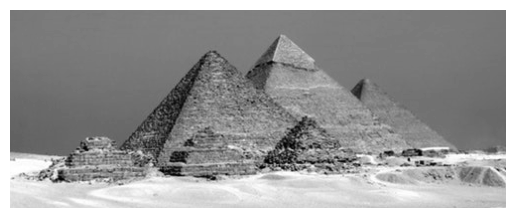

In [3]:
# Preparing the test image
cufe = io.imread("images/pyramids.jpeg")
grayscale_cufe = (rgb2gray(cufe) * 255).astype(np.int64)
grayscale_cufe = grayscale_cufe[500:700, 100:600]
# Display the image
plt.imshow(grayscale_cufe, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

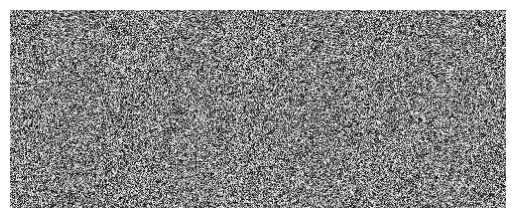

In [4]:
# Encrypt the image
encryptedCUFE = encryptImage(grayscale_cufe)
plt.imshow(encryptedCUFE, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

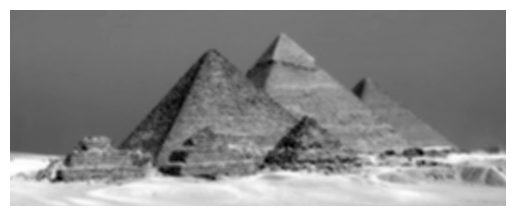

In [5]:
# Normal Convolution
testKernel = np.array([[1, 1, 1, 1, 1], [1, 2, 2, 2, 1], [1, 2, 3, 2, 1], [1, 2, 2, 2, 1], [1, 1, 1, 1, 1]]).astype(np.int64)
#paddedGrayscaleCUFE = replicate_border(grayscale_cufe, 20, 20, 20, 20)
testOutput = convolve2D(grayscale_cufe, testKernel)
plt.imshow(testOutput, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

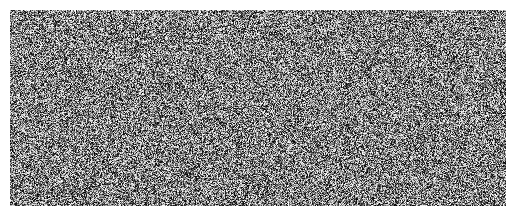

In [6]:
# Encrypted Convolution
encryptedOutput = encryptedConvolve2D(encryptedCUFE, testKernel)
plt.imshow(encryptedOutput, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

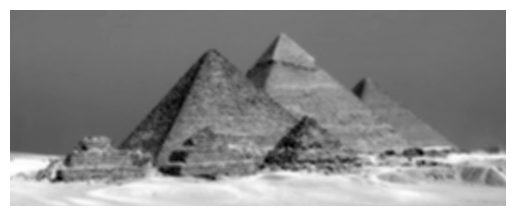

In [7]:
plt.imshow(decryptImage(encryptedOutput), cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

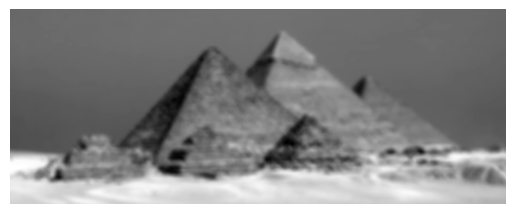

In [8]:
# Normal Convolution
testKernel = np.array([[1, 1, 1, 1, 1, 1, 1],
                       [1, 2, 2, 2, 2, 2, 1],
                       [1, 2, 3, 3, 3, 2, 1],
                       [1, 2, 3, 4, 3, 2, 1],
                       [1, 2, 3, 3, 3, 2, 1],
                       [1, 2, 2, 2, 2, 2, 1],
                       [1, 1, 1, 1, 1, 1, 1]]).astype(np.int64)
#paddedGrayscaleCUFE = replicate_border(grayscale_cufe, 20, 20, 20, 20)
testOutput = convolve2D(grayscale_cufe, testKernel)
plt.imshow(testOutput, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

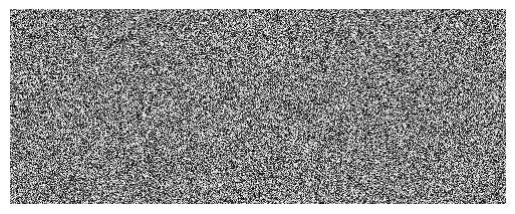

In [9]:
# Encrypted Convolution
encryptedOutput = encryptedConvolve2D(encryptedCUFE, testKernel)
plt.imshow(encryptedOutput, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

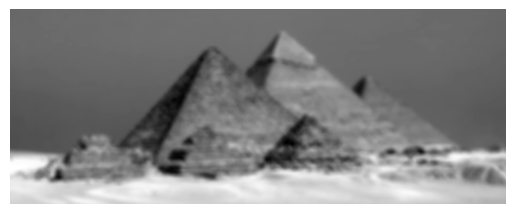

In [10]:
plt.imshow(decryptImage(encryptedOutput), cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

In [23]:
# Normal Convolution
testKernel1 = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]]).astype(np.int64)
testKernel2 = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]]).astype(np.int64)
#paddedGrayscaleCUFE = replicate_border(grayscale_cufe, 20, 20, 20, 20)
testOutput1 = convolve2D(grayscale_cufe, testKernel1)
testOutput2 = convolve2D(grayscale_cufe, testKernel2)

In [24]:
# Encrypted Convolution
encryptedOutput1 = encryptedConvolve2D(encryptedCUFE, testKernel1)
encryptedOutput2 = encryptedConvolve2D(encryptedCUFE, testKernel2)

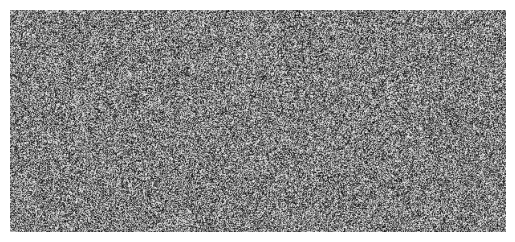

In [25]:
plt.imshow(encryptedOutput1, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

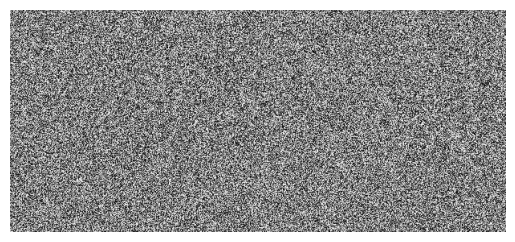

In [26]:
plt.imshow(encryptedOutput2, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

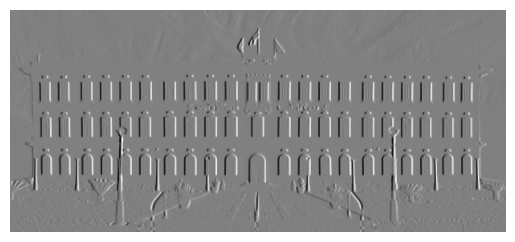

In [27]:
plt.imshow(decryptImage(encryptedOutput1), cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

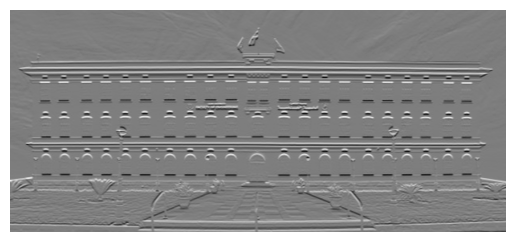

In [28]:
plt.imshow(decryptImage(encryptedOutput2), cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

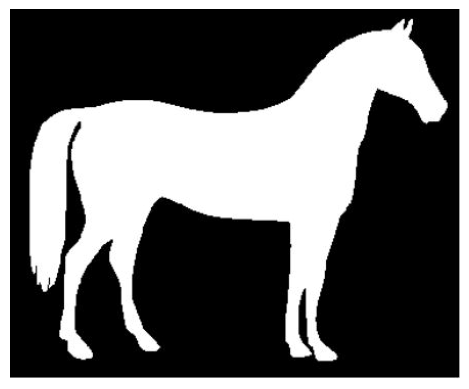

In [12]:
# Preparing the test image
horse = io.imread("images/horse.jpg")
grayscale_horse = (rgb2gray(horse) * 255).astype(np.int64)
#grayscale_cufe = grayscale_cufe[500:700, 100:600]
# Display the image
plt.imshow(grayscale_horse, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

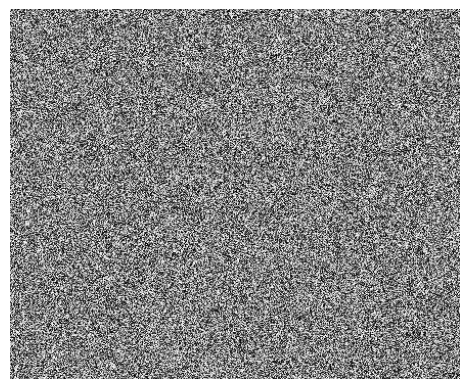

In [13]:
encryptedHorse = encryptImage(grayscale_horse)
plt.imshow(encryptedHorse, cmap='gray')
plt.axis('off') # This hides the axis
plt.show()

### As we can see, convolution was executed successfully in the encrypted domain.
### Try out different images and filters!